In [1]:
# Improve by ChatGPT & GitHub Copilot
# Running the requierements.ipynb
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/OSSE_generator/requierements.ipynb

In [2]:
dac_original = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/DAC_limpio/dac.nc")

In [45]:
dac_original

<xarray.Dataset> Size: 6GB
Dimensions:    (latitude: 721, longitude: 1440, time: 1460)
Coordinates:
  * latitude   (latitude) float64 6kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 12kB 2014-01-01 ... 2014-12-31T18:00:00
Data variables:
    dac        (time, latitude, longitude) float32 6GB dask.array<chunksize=(1460, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.4
    title:        MOG2D-G HR barotropic model output (high frequencies) combi...
    institution:  CNES/CNRS-LEGOS/CLS
    source:       MOG2D-G(Pressure+Wind)+Inverted Barometer, system version 3...
    history:      no
    references:   http://www.aviso.oceanobs.com
    comment:      Low Frequencies/High Frequencies:20 day cutoff

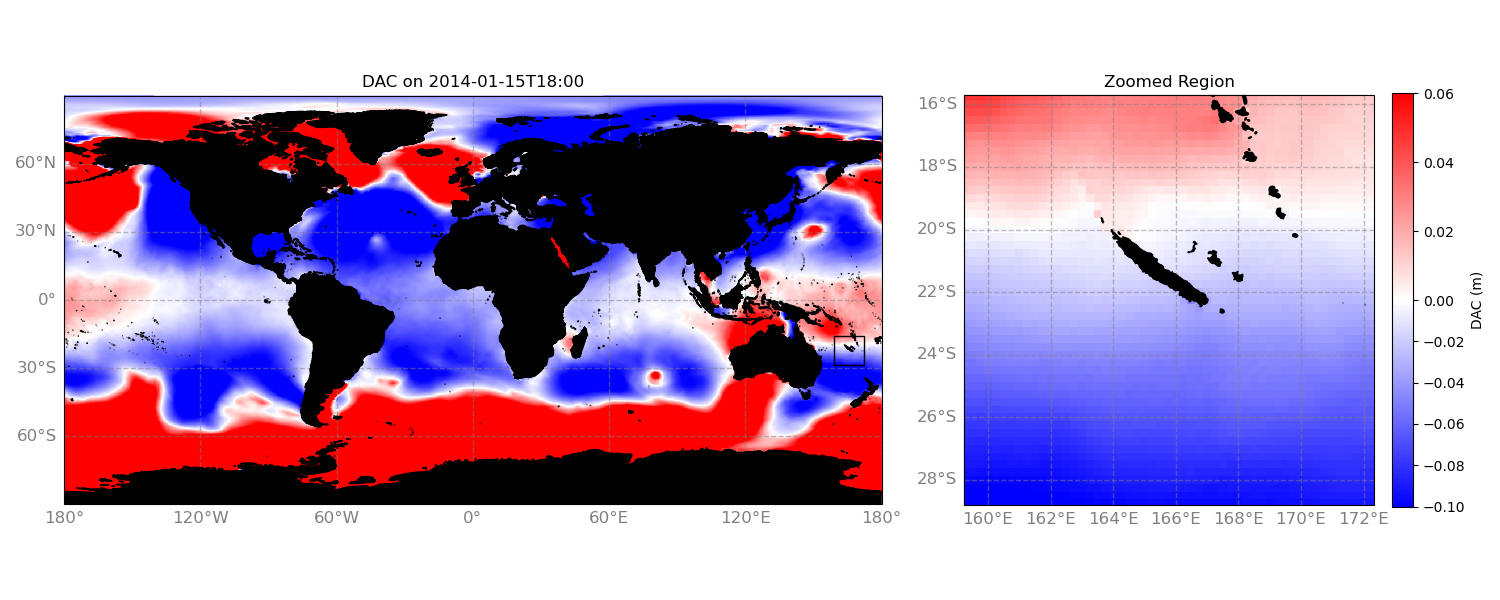

In [4]:
# Convert the integer timestamps in the 'time' coordinate to datetime objects
dac_original['time'] = pd.to_datetime(dac_original['time'].values)

# Desired date and time for plotting
date = np.datetime64('2014-01-15T18:00')

# Select 'dac' data for the specified date using the 'nearest' method
dac = dac_original.sel(time=date, method='nearest')['dac']

# Extract latitude and longitude coordinates directly from the dataset
lat = dac_original['latitude'].values
lon = dac_original['longitude'].values

# Define the colorbar range based on your data's needs
colorbar_max_dac = 0.06
colorbar_min_dac = -0.1

# Initialize figure with GridSpec for custom subplot sizes
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[1.82, 1])  # Adjust width ratios to balance subplot sizes

# Define custom colormap
# Custom colormap and normalization
cmap_colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]  # Blue, White, Red
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors)
#custom_cmap.set_bad(color='black')  # Set NaN values to gray
norm = mcolors.TwoSlopeNorm(vmin=-0.1, vcenter=0, vmax=0.06)

# Define normalization to center the colormap at zero
norm = mcolors.TwoSlopeNorm(vmin=colorbar_min_dac, vcenter=0, vmax=colorbar_max_dac)

# Main plot
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.set_title(f'DAC on {date}')
dac_plot = ax1.pcolormesh(lon, lat, dac, shading='auto', cmap=custom_cmap, norm=norm)

# Add land with higher resolution to the main plot on top, filled black
ax1.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='black', zorder=3)

# Add gridlines with labels to the main plot
gl1 = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 12, 'color': 'gray'}
gl1.ylabel_style = {'size': 12, 'color': 'gray'}

# Draw a red rectangle on the main plot to indicate the zoomed area
lon_min, lon_max = 159.23333740234375, 172.34999084472656
lat_min, lat_max = -28.803945541381836, -15.699763298034668
ax1.add_patch(plt.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                            linewidth=1, edgecolor='black', facecolor='none', zorder=4))

# Zoomed plot
ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax2.set_title('Zoomed Region')
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax2.pcolormesh(lon, lat, dac, shading='auto', cmap=custom_cmap, norm=norm)
# Add land with higher resolution to the zoomed plot on top, filled black
ax2.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='black', zorder=3)

# Add gridlines with labels to the zoomed plot
gl2 = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False  # Disable labels at the top
gl2.right_labels = False  # Disable labels on the right
gl2.xlabel_style = {'size': 12, 'color': 'gray'}
gl2.ylabel_style = {'size': 12, 'color': 'gray'}

# Add colorbar to the right of the zoomed plot
plt.colorbar(dac_plot, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04).set_label('DAC (m)')

plt.tight_layout()
plt.show()


In [3]:
# Convert the integer timestamps in the 'time' coordinate to datetime objects
dac_original['time'] = pd.to_datetime(dac_original['time'].values)

# Define the start and end dates for the loop
start_date = np.datetime64('2014-04-02T00:00')
end_date = np.datetime64('2014-12-31T18:00')

# Define initial frame counter
frame_counter = 365

# Define colorbar range and custom colormap
colorbar_max_dac = 0.06
colorbar_min_dac = -0.1
cmap_colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]  # Blue, White, Red
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors)
norm = mcolors.TwoSlopeNorm(vmin=colorbar_min_dac, vcenter=0, vmax=colorbar_max_dac)

# Loop through each time step within the specified range
for i, date in enumerate(pd.date_range(start_date, end_date, freq='6H')):
    dac = dac_original.sel(time=date, method='nearest')['dac']
    lat = dac_original['latitude'].values
    lon = dac_original['longitude'].values

    fig = plt.figure(figsize=(15, 6))
    gs = GridSpec(1, 2, width_ratios=[1.82, 1])

    ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
    ax1.set_title(f'DAC on {date}')
    dac_plot = ax1.pcolormesh(lon, lat, dac, shading='auto', cmap=custom_cmap, norm=norm)
    ax1.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='black', zorder=3)
    gl1 = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl1.top_labels, gl1.right_labels = False, False
    gl1.xlabel_style, gl1.ylabel_style = {'size': 12, 'color': 'gray'}, {'size': 12, 'color': 'gray'}
    ax1.add_patch(plt.Rectangle((159.23333740234375, -28.803945541381836), 172.34999084472656 - 159.23333740234375, -15.699763298034668 + 28.803945541381836, linewidth=1, edgecolor='black', facecolor='none', zorder=4))

    ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
    ax2.set_title('Zoomed Region')
    ax2.set_extent([159.23333740234375, 172.34999084472656, -28.803945541381836, -15.699763298034668], crs=ccrs.PlateCarree())
    ax2.pcolormesh(lon, lat, dac, shading='auto', cmap=custom_cmap, norm=norm)
    ax2.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='black', zorder=3)
    gl2 = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl2.top_labels, gl2.right_labels = False, False
    gl2.xlabel_style, gl2.ylabel_style = {'size': 12, 'color': 'gray'}, {'size': 12, 'color': 'gray'}

    plt.colorbar(dac_plot, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04).set_label('DAC (m)')
    plt.tight_layout()

    # Save the plot for the current time step
    plt.savefig(f'/bettik/PROJECTS/pr-data-ocean/riverama/Frames/DAC_uncropped/frame_{frame_counter + i:04d}.png')
    plt.close(fig)  # Close the figure to free memory



: 